In [1]:
from letter import gxl2Graph
import json
import networkx as nx
import matplotlib.pyplot as plt
from EMD import GGMD
import numpy as np

In [15]:
data = open('../data/PROTOTYPE/E_prototype.json')
gxl = json.load(data)
g1 = gxl2Graph(gxl)

data = open('../data/Letter/json/LOW/AP1_0010.json')
gxl = json.load(data)
g2 = gxl2Graph(gxl)

G1 = nx.Graph()
G1.add_nodes_from(g1.vertices)
G1.add_edges_from(g1.edges)

G2 = nx.Graph()
G2.add_nodes_from(g2.vertices)
G2.add_edges_from(g2.edges)


In [16]:
cost, flow = GGMD(g1, g2, 2, 1, 10000)

for u in flow.values():
    for v, w in u.items():
        u[v] = { 'weight': w } 
# print( flow )
F = nx.DiGraph(flow)
F.remove_node("eps1")
F.remove_node("eps2")
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w == 0])

In [17]:
pos1 = {}
for v in G1.nodes:
        pos1[v] = v.coords

pos2 = {}
for v in G2.nodes:
        pos2[v] = np.add( v.coords, (4, 0) ) 

pos = {"eps1": (0, 3), "eps2": (0, -3)}
for v in F.nodes:
    if v != "eps1" and v != "eps2":
        if v in g2.vertices:
                pos[v] = np.add( v.coords, (4, 0) )
        else:
                pos[v] = v.coords

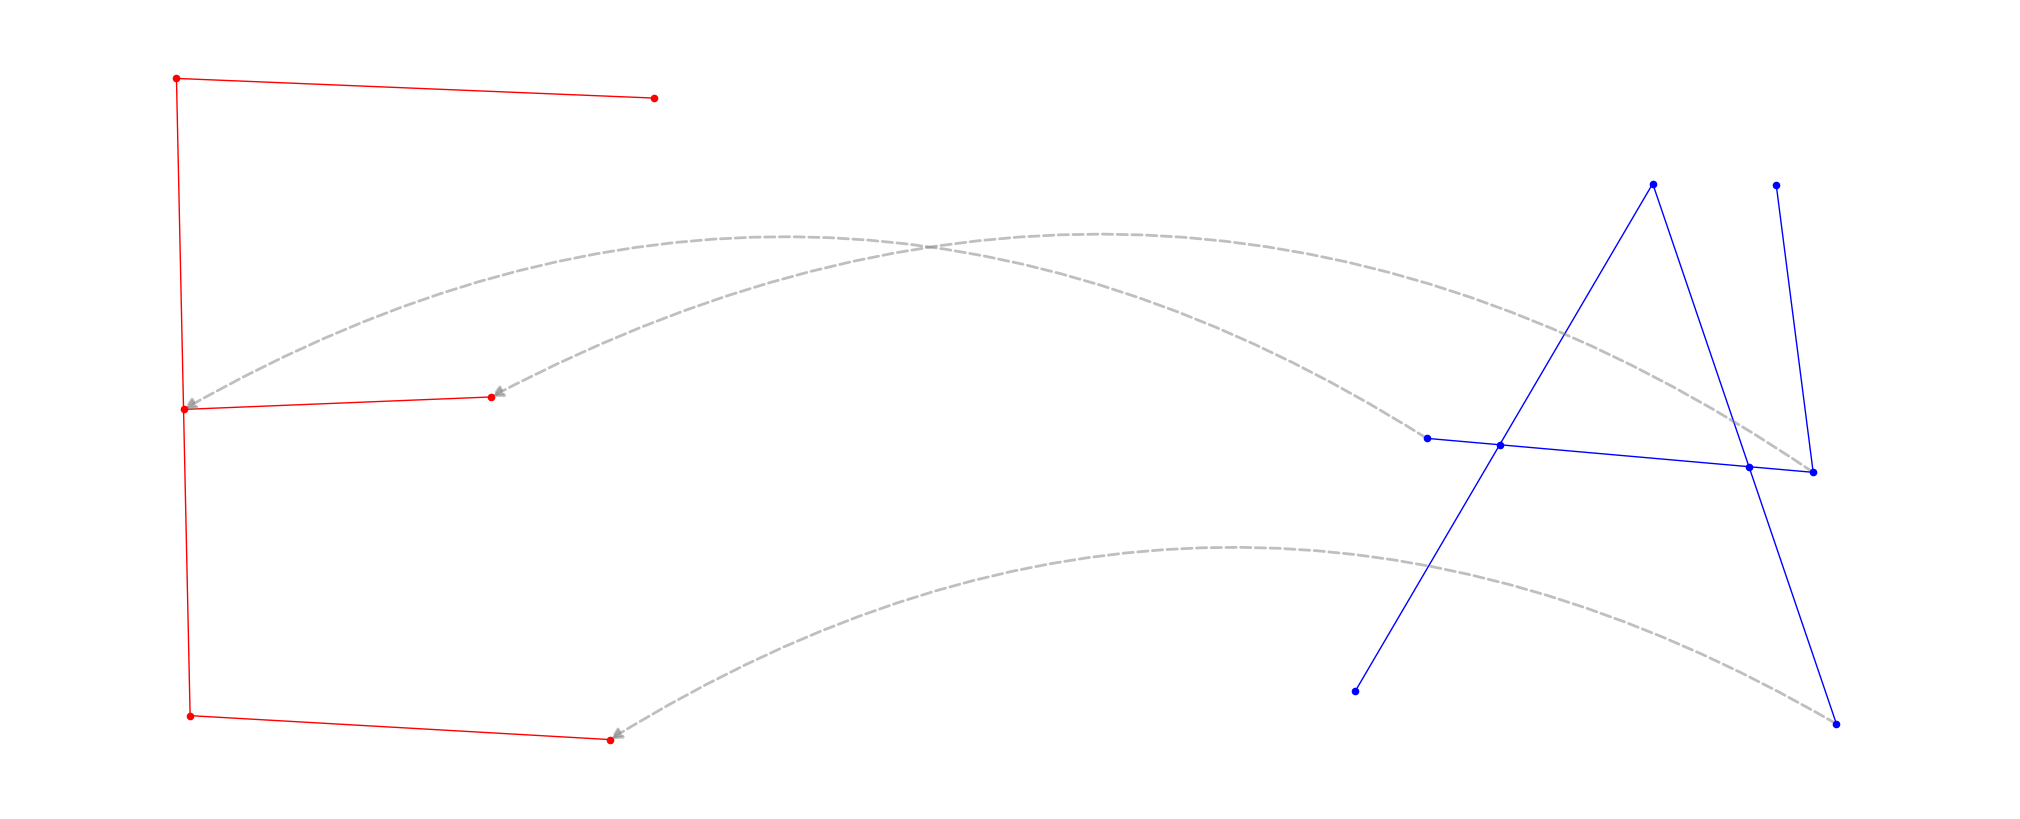

In [18]:
fig = plt.figure(figsize=(20, 8))
nx.draw(G1, pos1, edge_color = "red", node_color = "red", node_size = 20, with_labels = False)
nx.draw(G2, pos2, edge_color = "blue", node_color = "blue", node_size = 20, with_labels = False)
nx.draw(F, pos, edge_color = "gray", width = 2, style = '--', node_size = 0, alpha = 0.5, connectionstyle="arc3, rad=0.3", arrowsize = 17)
# weights = nx.get_edge_attributes(F, 'weight').values()
# nx.draw(F, pos, **options, width=list(weights))